# Trabalho 4 de Cálculo Numérico #
Alunos: 
    - Gustavo de Souza Curty
    - Matheus Iack
    - Matheus Marendino

-> Aproximacao de Integrais

- Formula do Trapezio Repetida;
- Formula de Simpson repetida 

Exercicio mod. 4.1
1) Calcular uma aproximação da integral dada abaixo usando 10 subintervalos
usando a regra do trapézio repetida. Calcule o desvio relativo percentual e a
cota máxima do erro de truncamento;
2) Qual é o número mínimo de subdivisões de modo que a cota máxima do erro de
truncamento seja inferior a 10-3

Trapezio Repetida

In [1]:
! pip install scipy
! pip install sympy


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from math import e  
from sympy import diff, symbols, integrate, exp
import sympy as sp

In [3]:
# DEF

# Função a ser integrada
def f(x):
    return np.exp(x)    

# Derivada segunda da função
def f_double_prime(x):
    return np.exp(x)

# Formula do Trapezio Repetida #


In [4]:
a = 0
b = 1 
m = 10 # Subintervalos

h = (b - a)/m
print(h)

0.1


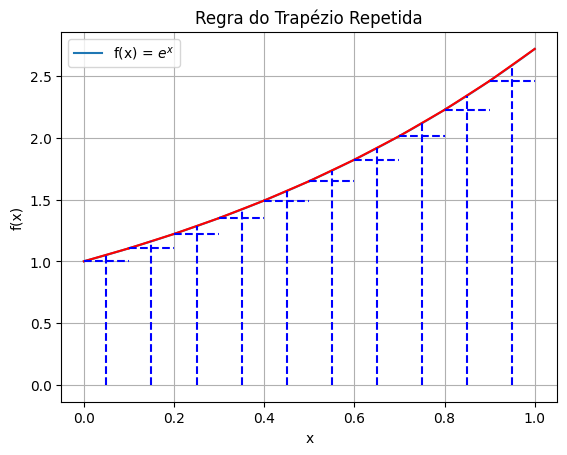

In [5]:
# Pontos para o gráfico
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

# Pontos para a Regra do Trapézio Repetida
x_trap = np.linspace(a, b, m + 1)
y_trap = f(x_trap)

# Plotagem da função
plt.plot(x_vals, y_vals, label='f(x) = $e^x$')

# Plotagem dos trapézios e linhas verticais
for i in range(m):
    plt.plot([x_trap[i], x_trap[i + 1]], [f(x_trap[i]), f(x_trap[i + 1])], color='red')
    mid_point = (x_trap[i] + x_trap[i + 1]) / 2
    plt.vlines(x=mid_point, ymin=0, ymax=f(mid_point), linestyle='--', color='blue')

# Linha horizontal para representar h
for i in range(m):
    plt.hlines(y=f(x_trap[i]), xmin=x_trap[i], xmax=x_trap[i + 1], linestyle='--', color='blue')

# Configurações do gráfico
plt.title('Regra do Trapézio Repetida')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Pontos para a Regra do Trapézio Repetida
x_trap = np.linspace(a, b, m + 1)
y_trap = f(x_trap)

# Cálculo da aproximação r*
r_star = (h / 2) * (f(a) + 2 * np.sum(f(x_trap[1:m])) + f(b))

print("Aproximação r*: {:.6f} u.a.".format(r_star))

Aproximação r*: 1.719713 u.a.


In [7]:
# Cálculo da referência r
result, error = quad(f, a, b)

print("Referência r: {:.6f} u.a.".format(result))

Referência r: 1.718282 u.a.


In [8]:
drp = abs(r_star - result) / abs(result) * 100

print("Desvio Relativo Percentual(DRP): {:.2f}%".format(drp))

Desvio Relativo Percentual(DRP): 0.08%


In [9]:
# Parâmetros
a = 0
b = 1

# Tamanho do subintervalo
h = b - a

# Cálculo da integral aproximada usando a regra do Trapézio simples
r_trapezio_simples = h * (f(a) + f(b)) / 2

print("Aproximação usando a regra do Trapézio simples: {:.6f}".format(r_trapezio_simples))

# Cálculo da referência r
result, _ = quad(f, a, b)

# Cálculo do desvio relativo percentual (DRP)
drp_trapezio_simples = abs(r_trapezio_simples - result) / abs(result) * 100

print("Desvio Relativo Percentual (DRP): {:.2f}%".format(drp_trapezio_simples))

Aproximação usando a regra do Trapézio simples: 1.859141
Desvio Relativo Percentual (DRP): 8.20%


In [10]:
# Parâmetros
a = 0
b = 1
n = 10
h = (b - a) / n

# Pontos para a Regra do Trapézio Repetida
x_trap = np.linspace(a, b, n + 1)

# Cálculo da cota máxima do erro de truncamento (TM)
tm_max = (h**2 / 12) * np.max(np.abs(f_double_prime(x_trap)))

print("A cota máxima de erro de truncamento vale: {:.6e}".format(tm_max))

A cota máxima de erro de truncamento vale: 2.265235e-03


In [11]:
# Parâmetros
a = 0
b = 1
tm_threshold = 1e-3  # Limiar para a cota máxima do erro de truncamento
max_f_double_prime = 2.718282
h_squared_limit = 0.00441

# Inicialização do número de subdivisões
n_min = 1

# Loop para encontrar o número mínimo de subdivisões
while True:
    h = (b - a) / n_min
    tm = (h**2 / 12) * max_f_double_prime
    if tm < tm_threshold and h**2 < h_squared_limit:
        break
    n_min += 1

print("Número mínimo de subdivisões: {}".format(n_min))

Número mínimo de subdivisões: 16


# SIMPSON REPETIDA #


In [12]:
# DEF
def f(x):
    return x * (e**x)     


# DADOS DE ENTRADA
n = 1  # Numero de subintervalos


x0 = 0  
fx0 = f(x0) # Funcao de x0
x2 = 0.1
fx2 = f(x2) # FUncao de x2     

# Calculo x1    
x1 = ((x0 + x2)/2)
fx1 = f(x1)

# Calculo H
h = 0
h = (x2 - x1)/ n

# RESULTADOS
print("Resultado de x0: {}".format(fx0))
print("Resultado de x2: {}".format(fx2))
print("\n")
print("Resultado de x1: {}".format(fx1))
print("\n")
print("O Resultado de h: {}".format(h))

Resultado de x0: 0.0
Resultado de x2: 0.11051709180756478


Resultado de x1: 0.052563554818801206


O Resultado de h: 0.05


In [13]:
# Calculo da aproximacao 

rstaarr = 0

for i in range(0, n):
    x_i = x0 + i * h
    x_i2 = x_i + 2 * h
    
    rstaarr += h / 3 * (f(x_i) + 4 * f((x_i + x_i2) / 2) + f(x_i2))

# Imprima o resultado
print("Aproximação da integral: {:.6f}".format(rstaarr))

Aproximação da integral: 0.005346


In [14]:
# Definir a variável simbólica
x = symbols('x')

f = f(x)

# Calcular a integral exata
rref = integrate(f, (x, x_i, x_i2))

# Imprimir o resultado
print("Valor da referência: {:.6f} u.a.".format(rref))
print("\n")

# Desvio Relativo Percentual (DRP) 

DRP = abs((rref - rstaarr) / (rref)) * 100

print("Desvio Relativo Percentual(DRP): {:.2f}%".format(DRP))

Valor da referência: 0.005346 u.a.


Desvio Relativo Percentual(DRP): 0.00%


In [15]:

# ERRO DE TRUNCAMENTO
   
# Definindo o símbolo e a função
x = sp.symbols('x')

# Derivando a função quatro vezes
derivative_4 = sp.diff(f, x, 4)

# Exibindo o resultado
print("Função original:", f)
print("4ª derivada:", derivative_4)
print("\n")


# Agora substituindo   

f_derivade_d_x0 = derivative_4.subs(x, x0)

erroTrucx0 = abs(((h**5)/90) * (f_derivade_d_x0))



f_derivade_d_x2 = derivative_4.subs(x, x2)
erroTrucx2 = abs(((h**5)/90) * (f_derivade_d_x2))


# Exibindo os resultados
print(f"Erro de truncamento em x0 ({x0}):", erroTrucx0)
print(f"Erro de truncamento em x2 ({x2}):", erroTrucx2)
print("\n")


# Encontrando a cota máxima
cota_maxima = max(erroTrucx0, erroTrucx2)
print("Cota máxima:", cota_maxima)

Função original: 2.71828182845905**x*x
4ª derivada: 2.71828182845905**x*(1.0*x + 4.0)


Erro de truncamento em x0 (0): 1.38888888888889e-8
Erro de truncamento em x2 (0.1): 1.57333359864936e-8


Cota máxima: 1.57333359864936e-8


In [16]:
# Definindo as variáveis
a = x0
b = x2

# Calculando o erro total de truncamento
TM = abs(((b - a) * h**4) / 90) * cota_maxima

print("Erro Total de Truncamento:", TM)


Erro Total de Truncamento: 1.09259277683983e-16
